<a href="https://colab.research.google.com/github/Raghava2004-cpu/AL-ML-WnC/blob/main/Digit_Recognition_(MNIST)_raghava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Data transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.314,) , (0.414,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

trainloader = DataLoader(train_dataset, batch_size=100, shuffle=True)
testloader = DataLoader(test_dataset, shuffle=True, batch_size=100)

# Model
class CNN_mnist(nn.Module):
    def __init__(self):
        super(CNN_mnist, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1, stride=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_mnist().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 13
for epoch in range(epochs):
    loss_ = []
    model.train()
    total_loss = 0
    for data, labels in trainloader:
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        loss_.append(total_loss)

    print(f"Epoch: {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, labels in testloader:
        data, labels = data.to(device), labels.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = (correct / total) * 100
print(f"Accuracy: {accuracy:.2f}%")



Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 9.91M/9.91M [02:05<00:00, 79.2kB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28.9k/28.9k [00:00<00:00, 57.9kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1.65M/1.65M [00:06<00:00, 242kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.96MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch: 1/13, Loss: 119.7544
Epoch: 2/13, Loss: 45.9309
Epoch: 3/13, Loss: 36.6401
Epoch: 4/13, Loss: 31.0271
Epoch: 5/13, Loss: 28.4075
Epoch: 6/13, Loss: 23.1304
Epoch: 7/13, Loss: 20.1714
Epoch: 8/13, Loss: 19.0243
Epoch: 9/13, Loss: 16.7253
Epoch: 10/13, Loss: 15.7465
Epoch: 11/13, Loss: 13.7068
Epoch: 12/13, Loss: 13.6028
Epoch: 13/13, Loss: 11.6896
Accuracy: 99.41%


In [ ]:
torch.save(model, "mnist_cnn.pth")

In [2]:
import torch
# Save the state dictionary
torch.save(model.state_dict(), "mnist_cnn_new.pth")


<ipython-input-5-6d352ef28d6c>:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mnist_cnn_new.pth" , map_location = device ))


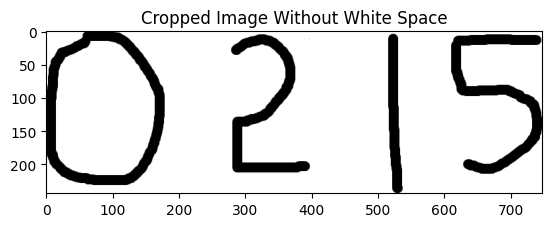

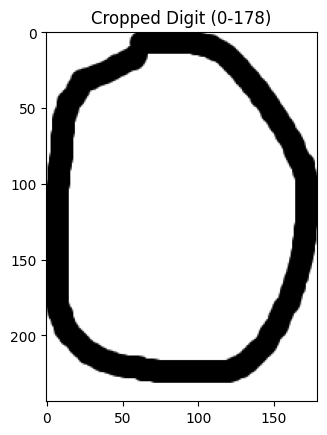

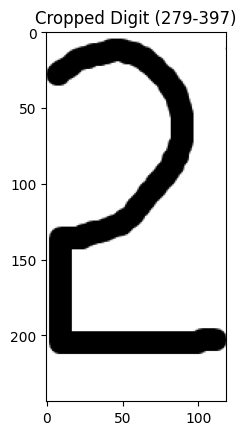

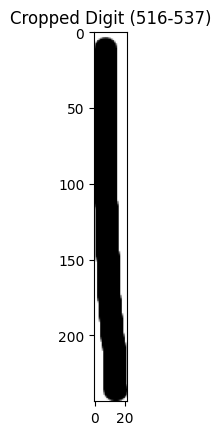

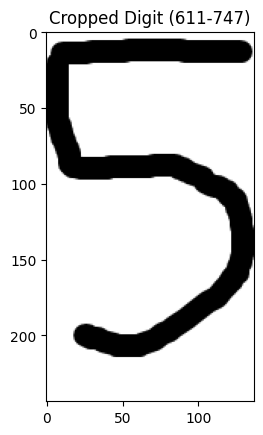

Predicted Digit: 0
Predicted Digit: 2
Predicted Digit: 1
Predicted Digit: 5
Predicted Sequence: [0, 2, 1, 5]


In [5]:
import torch
from torchvision import transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt


class CNN_mnist(torch.nn.Module):
    def __init__(self):
        super(CNN_mnist, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, kernel_size=3, padding=1, stride=1)
        self.bn1 = torch.nn.BatchNorm2d(32)
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1)
        self.bn2 = torch.nn.BatchNorm2d(64)
        self.maxpool = torch.nn.MaxPool2d(2)
        self.fc1 = torch.nn.Linear(64 * 7 * 7, 256)
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(p=0.5)
        self.fc2 = torch.nn.Linear(256, 128)
        self.fc3 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)    # flattenning  the output of maxpool layer = input of the fully connected layer1
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_mnist()
model.load_state_dict(torch.load("mnist_cnn_new.pth" , map_location = device ))
model.to(device)
model.eval()


image_path = "1.png"
image = Image.open(image_path).convert("L")

# Remove white space
image = ImageOps.invert(image)
bbox = image.getbbox()  # Get the bounding box of non-white pixels
image = image.crop(bbox)  # Crop to the bounding box
image = ImageOps.invert(image)  # Revert colors back to black on white

plt.imshow(image, cmap='gray')
plt.title("Cropped Image Without White Space")
plt.show()

# Convert the image to numpy for digit segmentation
image_array = np.array(image)

# Segment digits based on pixel intensity
projection = np.sum(image_array < 128, axis=0)  # Projection along x-axis
digit_boundaries = np.where(projection > 0)[0]

# Find start and end indices for each digit
splits = []
start = digit_boundaries[0]
for i in range(1, len(digit_boundaries)):
    if digit_boundaries[i] != digit_boundaries[i - 1] + 1:  # New digit detected
        splits.append((start, digit_boundaries[i - 1]))
        start = digit_boundaries[i]
splits.append((start, digit_boundaries[-1]))

# Crop each digit
cropped_digits = []
for (start, end) in splits:
    cropped_digit = image.crop((start, 0, end + 1, image.height))
    cropped_digits.append(cropped_digit)
    plt.imshow(cropped_digit, cmap='gray')
    plt.title(f"Cropped Digit ({start}-{end})")
    plt.show()

# Preprocess each cropped digit
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

processed_digits = [transform(digit).unsqueeze(0).to(device) for digit in cropped_digits]

# Predict each digit
predicted_sequence = []
with torch.no_grad():
    for digit_tensor in processed_digits:
        output = model(digit_tensor)
        _, predicted = torch.max(output, 1)
        predicted_sequence.append(predicted.item())
        print(f"Predicted Digit: {predicted.item()}")  # For debugging

# Output the predicted sequence
print("Predicted Sequence:", predicted_sequence)
